In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from IPython.display import clear_output

In [2]:
#tensorflow keras dataset에서 가져온 데이타셋.
train_image = np.load('mnist_train_image.npy')
train_label = np.load('mnist_train_label.npy')

In [3]:
train_image.shape

(60000, 28, 28)

0
(28, 28)


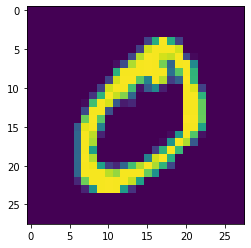

In [4]:
print(train_label[1])
print(train_image[1].shape)
plt.imshow(train_image[1])
plt.show()



In [5]:
# 코드가 잘 실행되고 있는지 실험을 위해서 하나 저장해 둠.
sample_image = train_image[1].copy()

In [6]:
# 훈련 데이터 셔플
index = np.array(range(len(train_image)))
np.random.shuffle(index)
train_image = train_image[index]
train_label = train_label[index]

In [7]:
train_image[0][:10,:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [8]:
# 데이터 전처리 
train_image = (train_image -[128]) / 128

In [9]:
# 훈련데이터와 검증데이터 분리 
sp = int(5e4)
train_x = train_image[:sp]
train_y = train_label[:sp].astype(np.int32)
valid_x = train_image[sp:]
valid_y = train_label[sp:].astype(np.int32)

In [10]:
# 토치 텐서로 변환
train_x = torch.FloatTensor(train_x)
train_y = torch.LongTensor(train_y)
valid_x = torch.FloatTensor(valid_x)
valid_y = torch.LongTensor(valid_y)

In [11]:
class net(torch.nn.Module):

    def __init__(self):
        super(net, self).__init__()
        
        self.fc1    = nn.Linear(28*28, 500) 
        self.fc2   = nn.Linear(500, 500)
        self.fc3   = nn.Linear(500, 500)
        self.fc4   = nn.Linear(500, 10)
        
        
    def forward(self, x):
        x = x.view(-1, 28*28) #입력 받은 배치에서 28*28 2d array를 1d array로 변환
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        return x
    
    def predict(self, image):
        image = (image -[128])/128
        image = torch.from_numpy(image).float()
        out   = self.forward(image).view(-1)
        return out.argmax().item()
    
    def accuracy(self, input_data, target_data):
        predict = self.forward(input_data).argmax(axis=1)
        correct_cnt = sum(predict==target_data)
        print("정확도는 %.2f%%입니다." %(100*correct_cnt/len(target_data)))
        pass
    
    def save(self, name):
        torch.save(self.state_dict(), name + '.pt')
        print('Models saved successfully')
    
    def load(self, name):
        self.load_state_dict(torch.load(name + '.pt'))
        print ('Models loaded succesfully')
    




In [12]:
dnn = net()

In [13]:
dnn.predict(sample_image)

3

In [14]:
dnn.forward(train_x[:100]).argmax(axis=1)

tensor([3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 0, 3, 3, 3, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
        3, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 3, 3, 3, 3,
        9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9,
        3, 3, 9, 3])

In [15]:
train_y[:100] == dnn.forward(train_x[:100]).argmax(axis=1)

tensor([False,  True,  True, False,  True, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False,  True, False, False, False,
        False,  True, False, False,  True,  True, False,  True, False, False,
         True, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False, False])

In [16]:
sum(_)

tensor(14)

In [17]:
dnn.accuracy(train_x, train_y)

정확도는 11.55%입니다.


In [18]:
class trainer:
    
    def __init__(self, net, lr, figname, train_x, train_y, valid_x, valid_y):
        
        self.net = net
        self.lrate = lr
        self.name = figname
        self.train_x, self.train_y = train_x, train_y
        self.valid_x, self.valid_y = valid_x, valid_y
        self.optimizer = optim.Adam(self.net.parameters(), lr=self.lrate)
        self.loss_layer    = nn.CrossEntropyLoss()
        self.train_loss_history = [] 
        self.valid_loss_history = [] 
    
    def plot(self, train_loss, valid_loss):
        clear_output(True)
        plt.figure(figsize=(12,6))
        plt.subplot(121)
        plt.title('train loss')
        plt.plot(train_loss, 'k-')
        plt.subplot(122)
        plt.title('valid loss')
        plt.plot(valid_loss)
        plt.savefig(self.name +'.png')
        plt.show()
    
    def train(self, epoch=10):
        
        for j in range(epoch):
            
            train_loss = 0
            idx = np.array(range(sp))
            np.random.shuffle(idx)
            train_x = self.train_x[idx]
            train_y = self.train_y[idx]
            for k in range(100):
                
                self.optimizer.zero_grad()
                loss = self.loss_layer(self.net.forward(train_x[500*k:500*(k+1)]), train_y[500*k:500*(k+1)])
                loss.backward()
                self.optimizer.step()
                train_loss += loss.item()
                
                
            self.train_loss_history.append(train_loss)
            self.valid_loss_history.append(self.loss_layer(self.net.forward(self.valid_x),self.valid_y).item())
        
            self.plot(self.train_loss_history, self.valid_loss_history)
            if np.argmin(self.valid_loss_history) == j:
                print("%d-th epoch에서 진척이 있었음." %(j+1))
                self.net.save('dnn')
            else:
                print("%d-th epoch에서는 진척 없음." %(j+1))
        print("훈련 종료.")
        print("%d번째 epoch에서 검증 손실 최소" %(np.argmin(self.valid_loss_history)+1))




In [19]:
tt = trainer(dnn, 2e-4, 'lr2e-4', train_x, train_y, valid_x, valid_y)

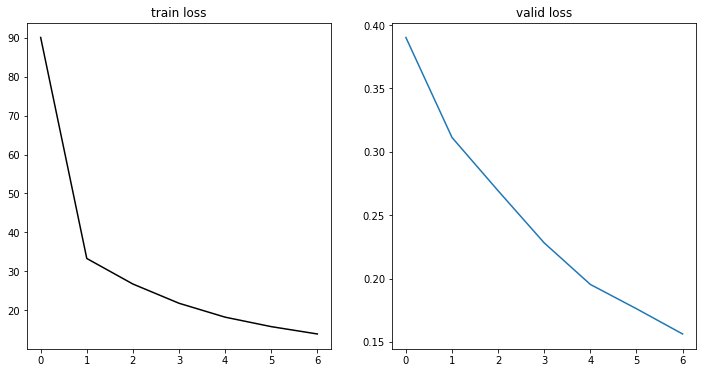

7-th epoch에서 진척이 있었음.
Models saved successfully


In [20]:
tt.train(50)

In [23]:
dnn.accuracy(train_x, train_y)

정확도는 80.22%입니다.


In [24]:
dnn.accuracy(valid_x, valid_y)

정확도는 79.03%입니다.


In [28]:
dnn.load('dnn') 
dnn.accuracy(valid_x, valid_y)

Models loaded succesfully
정확도는 99.01%입니다.


In [26]:
dnn.predict(sample_image)

0